In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('track_data.csv', index_col=0)

df.drop_duplicates(subset=['Track IDs'], keep='first', inplace=True)

df.head()

,Artists,Moods,Names,Track IDs,Loudness,Instrumentalness,Modality,Speechiness,Energy,Tempo,Valence
0,Lauv,sad,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",322tcqPhma7F6hfCeLisx0,-6.460,0.000000,1,0.0683,0.558,95.016,0.678
1,Sabrina Carpenter,sad,In My Bed,2o0KMNhcw5KO7CuslvR4Xs,-6.024,0.002290,0,0.0950,0.385,109.046,0.666
2,Bea Miller,sad,feel something,7JDWhC422Gtk1Bq0mL3OTC,-8.914,0.000156,1,0.0707,0.415,136.029,0.156
3,MUNA,sad,Who,0qTBo7ExHHGI7RLCk3CwDS,-5.770,0.000272,0,0.0514,0.667,150.093,0.219
4,Why Don't We,sad,8 Letters,4zRZAmBQP8vhNPf9i9opXt,-5.702,0.000000,0,0.0310,0.478,88.979,0.255


In [3]:
X = df.iloc[:, 4:].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

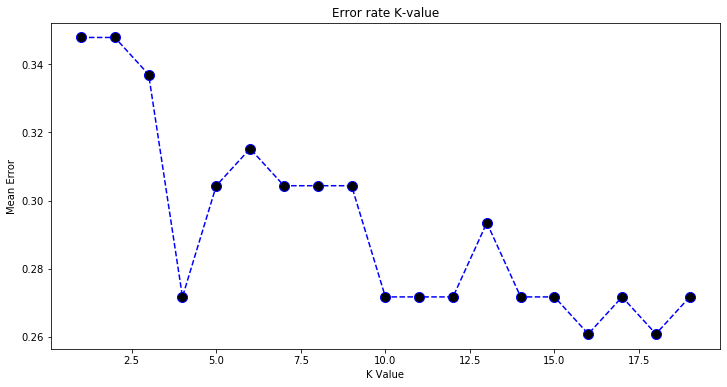

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), error, color='blue', marker='o', markerfacecolor='black', markersize=10, linestyle='dashed');
plt.title('Error rate K-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [23]:
knn = KNeighborsClassifier(n_neighbors=np.argmin(error))
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [24]:
y_pred = knn.predict(X_test)

In [25]:
knn_confusion = confusion_matrix(y_test, y_pred)

print(knn_confusion)
print(classification_report(y_test, y_pred))

[[30 14]
 [11 37]]
              precision    recall  f1-score   support

       happy       0.73      0.68      0.71        44
         sad       0.73      0.77      0.75        48

    accuracy                           0.73        92
   macro avg       0.73      0.73      0.73        92
weighted avg       0.73      0.73      0.73        92



High precision means that if the model predicts a "positive value" (ie. it predicted a song was happy), it is very likely that the prediction is correct. High recall, on the other hand, means that the model does a really good job at predicting all of the cases correctly (ie. the model currently does a good job at catching all of the happy songs and predicting them properly.)

In [26]:
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

The score for kNN is
Training:  75.00%
Test set:  72.83%


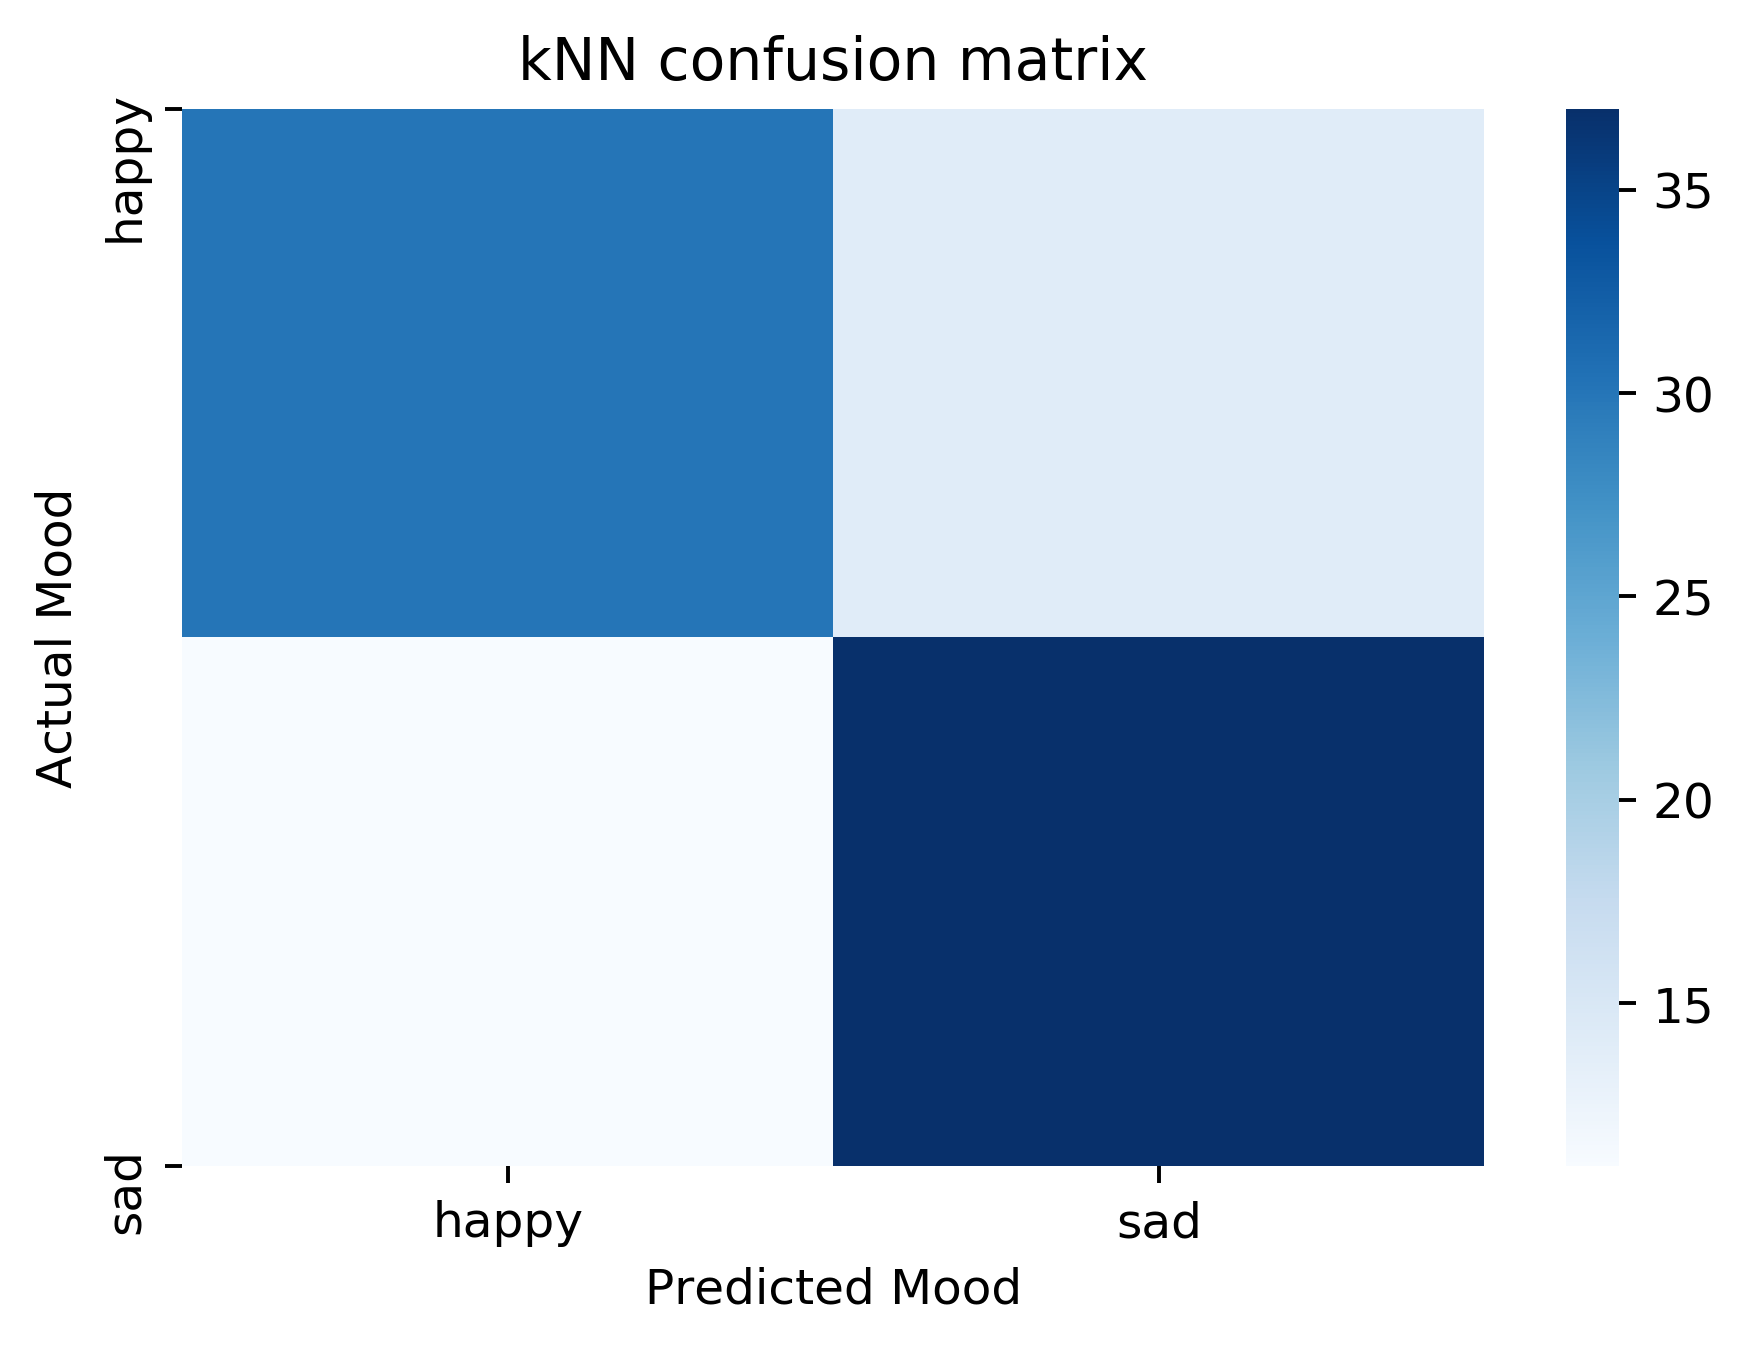

In [27]:
plt.figure(dpi=350)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues,
           xticklabels=['happy', 'sad'],
           yticklabels=['happy', 'sad'])

plt.xlabel('Predicted Mood')
plt.ylabel('Actual Mood')
plt.title('kNN confusion matrix');
plt.savefig('MVP.png')